# EDA

## IMPORTAR PAQUETES

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

#Automcompletar rápido
%config IPCompleter.greedy=True

## IMPORTAR LOS DATOS

Sustituir la ruta del proyecto.

In [4]:
ruta_proyecto = 'C:/Users/User/Desktop/DS4B/03_MACHINE_LEARNING/08_CASOS/RIESGOS'

Nombres de los ficheros de datos.

In [5]:
nombre_cat = 'cat_resultado_calidad.pickle'
nombre_num = 'num_resultado_calidad.pickle'

Cargar los datos.

In [6]:
cat = pd.read_pickle(ruta_proyecto + '/02_Datos/03_Trabajo/' + nombre_cat)
num = pd.read_pickle(ruta_proyecto + '/02_Datos/03_Trabajo/' + nombre_num)

## EDA CATEGÓRICAS

### Análisis estadístico

In [7]:
variables = ['antigüedad_empleo', 'ingresos_verificados', 'rating', 'vivienda',
       'finalidad', 'num_cuotas', 'estado']

In [8]:
def frecuencias_cat(df_cat):
    resultado = df_cat[variables].apply(lambda x: x.value_counts(normalize = True)).T.stack()\
                .to_frame().reset_index()\
                .rename(columns={'level_0':'Variable','level_1':'Valor',0: "Frecuencia"})\
                .sort_values(by = ['Variable','Frecuencia'])
    return(resultado)

In [9]:
frecuencias_cat(cat)

,Variable,Valor,Frecuencia
9,antigüedad_empleo,9 years,0.035473
8,antigüedad_empleo,8 years,0.041009
7,antigüedad_empleo,7 years,0.041031
6,antigüedad_empleo,6 years,0.045459
4,antigüedad_empleo,4 years,0.060155
5,antigüedad_empleo,5 years,0.062527
11,antigüedad_empleo,DESCONOCIDO,0.064390
0,antigüedad_empleo,1 year,0.065396
3,antigüedad_empleo,3 years,0.080559
10,antigüedad_empleo,< 1 year,0.084851


### Análisis gráfico

In [10]:
def graficos_eda_categoricos(cat):
    
    #Calculamos el número de filas que necesitamos
    from math import ceil
    filas = ceil(cat.shape[1] / 2)

    #Definimos el gráfico
    f, ax = plt.subplots(nrows = filas, ncols = 2, figsize = (16, filas * 6))

    #Aplanamos para iterar por el gráfico como si fuera de 1 dimensión en lugar de 2
    ax = ax.flat 

    #Creamos el bucle que va añadiendo gráficos
    for cada, variable in enumerate(cat):
        cat[variable].value_counts().plot.barh(ax = ax[cada])
        ax[cada].set_title(variable, fontsize = 12, fontweight = "bold")
        ax[cada].tick_params(labelsize = 12)

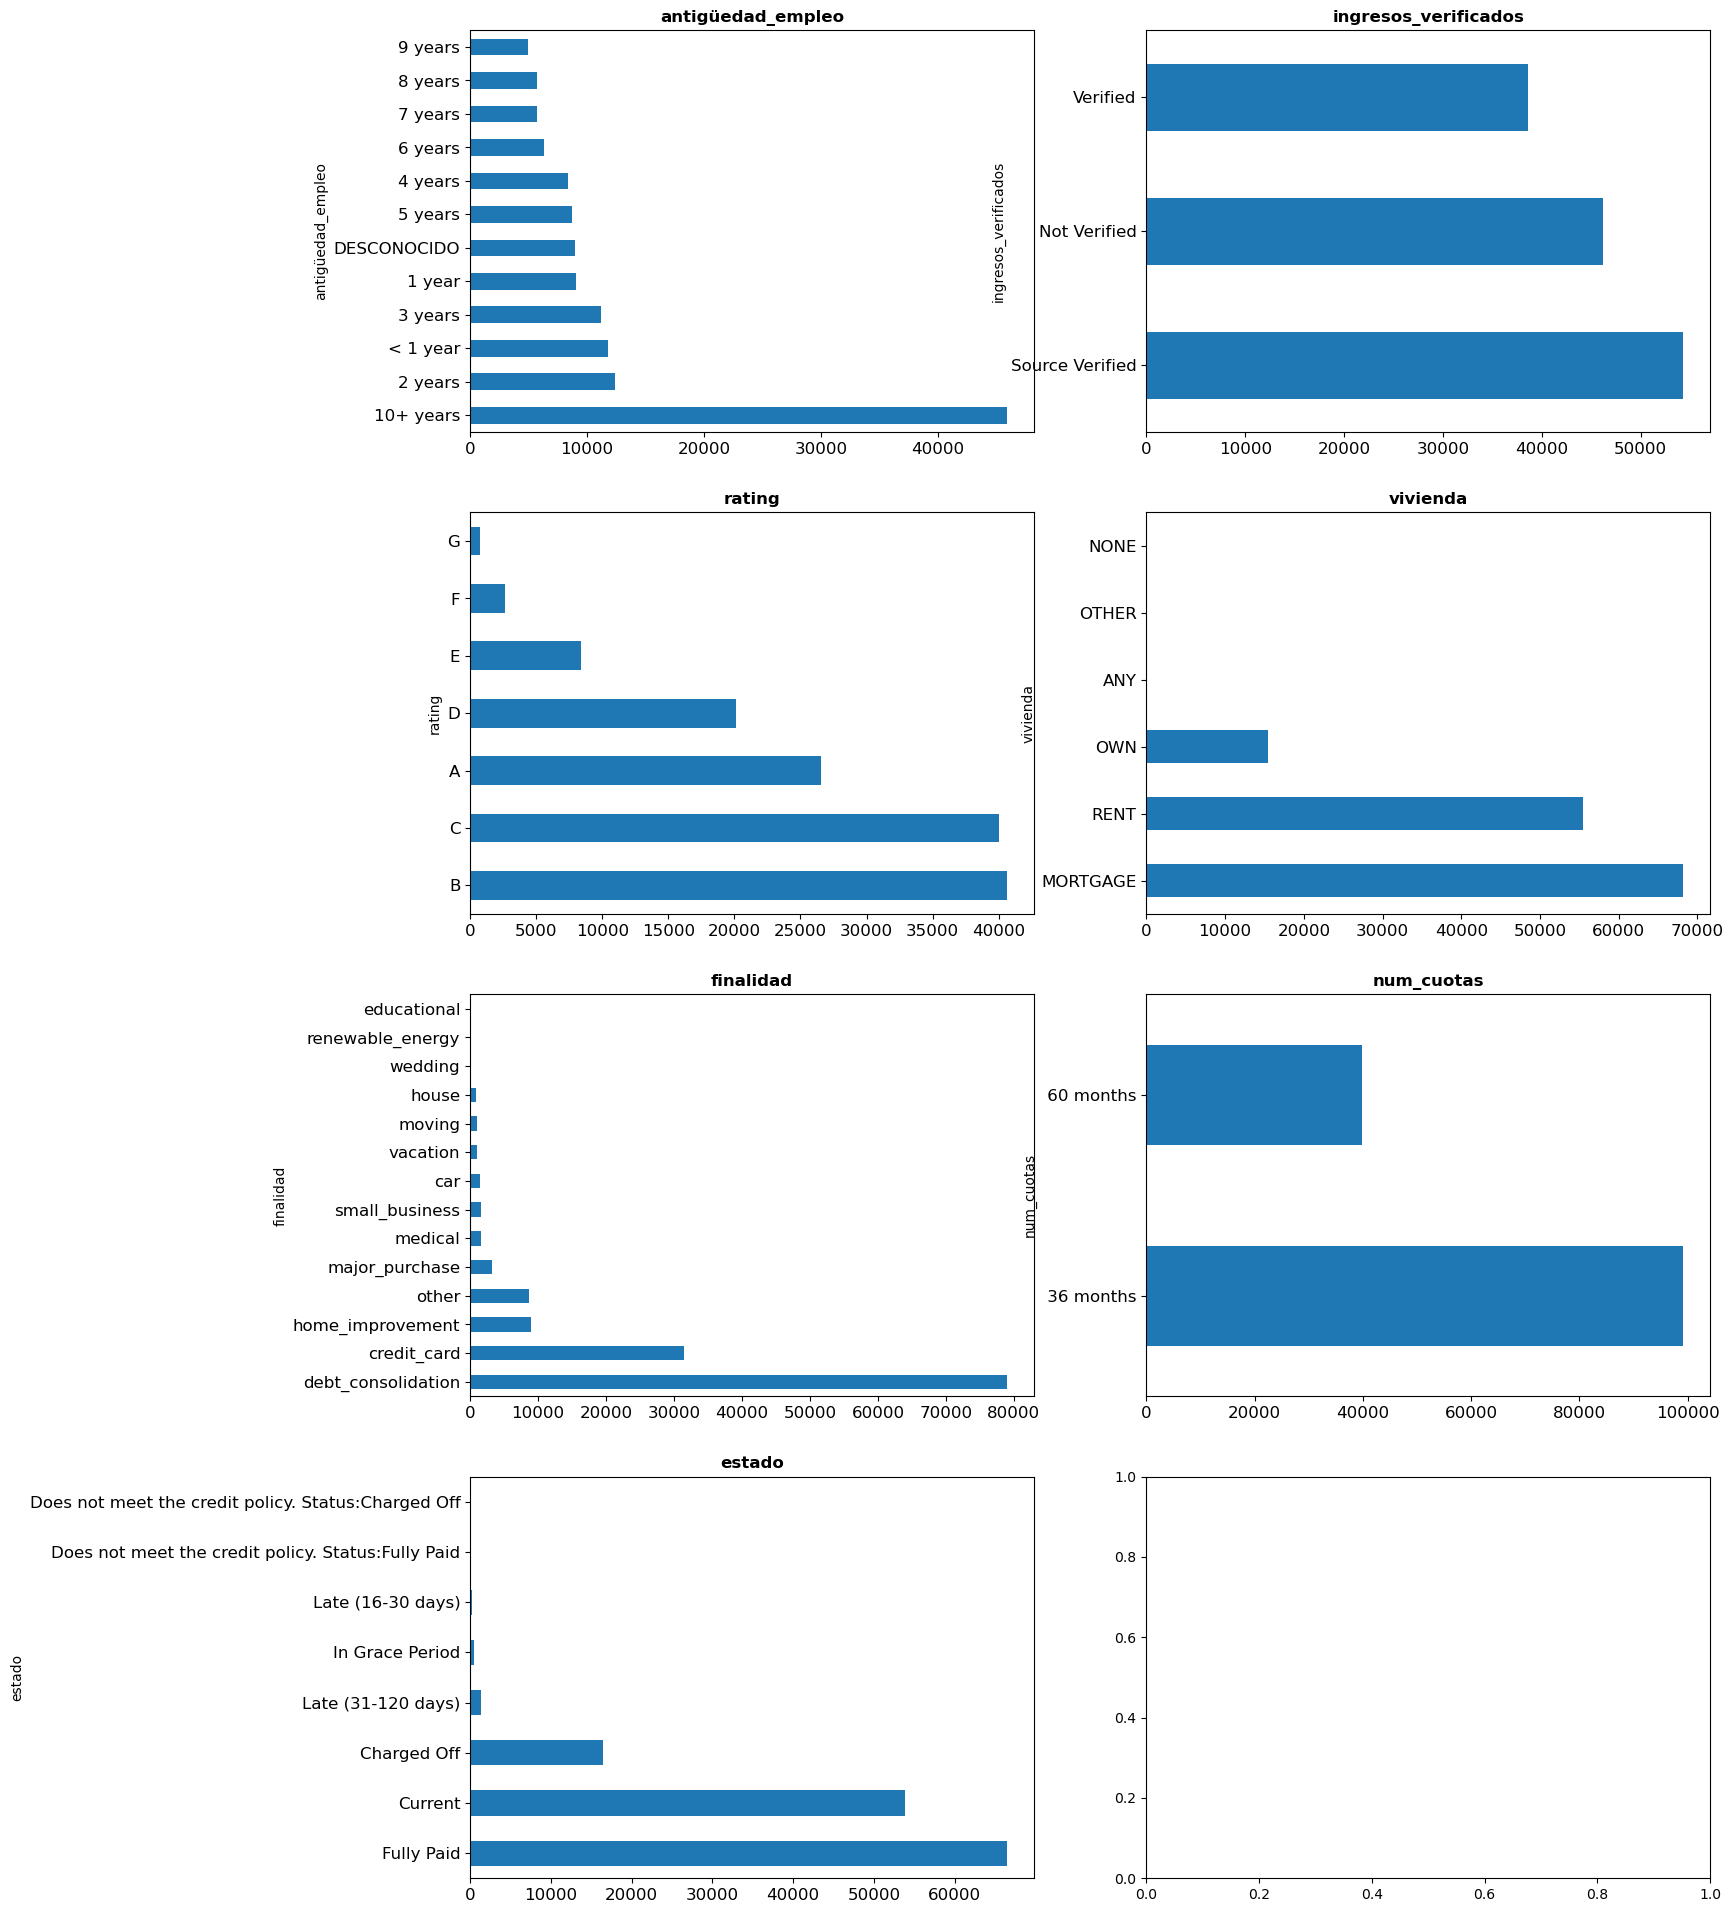

In [11]:
graficos_eda_categoricos(cat[variables])

Conclusiones:

En transformación:

* En vivienda juntar ANY, NONE y OTHER a la categoria mayoritaria
* En finalidad juntar renewable_energy, educational y wedding en 'otros'
* Crear la target a partir de estado

## EDA NUMÉRICAS

### Análisis estadístico

In [12]:
def estadisticos_cont(num):
    #Calculamos describe
    estadisticos = num.describe().T
    #Añadimos la mediana
    estadisticos['median'] = num.median()
    #Reordenamos para que la mediana esté al lado de la media
    estadisticos = estadisticos.iloc[:,[0,1,8,2,3,4,5,6,7]]
    #Lo devolvemos
    return(estadisticos)

In [13]:
estadisticos_cont(num)

,count,mean,median,std,min,25%,50%,75%,max
ingresos,139091.0,74989.816068,65000.00,42162.119725,0.00,46000.00,65000.00,92000.00,300000.00
dti,139091.0,18.882183,17.87,14.154303,-1.00,12.00,17.87,24.50,999.00
num_hipotecas,139091.0,1.503713,1.00,1.876776,0.00,0.00,1.00,2.00,32.00
num_lineas_credito,139091.0,11.602605,11.00,5.640920,0.00,8.00,11.00,14.00,91.00
porc_tarjetas_75p,139091.0,41.133063,33.30,36.420489,0.00,0.00,33.30,66.70,100.00
porc_uso_revolving,139091.0,50.364951,50.40,24.659892,0.00,31.70,50.40,69.30,366.60
num_cancelaciones_12meses,139091.0,0.008627,0.00,0.105075,0.00,0.00,0.00,0.00,7.00
num_derogatorios,139091.0,0.197087,0.00,0.564448,0.00,0.00,0.00,0.00,46.00
num_meses_desde_ult_retraso,139091.0,16.746856,0.00,22.976153,0.00,0.00,0.00,30.00,159.00
principal,139091.0,14971.696947,12675.00,9138.361523,600.00,8000.00,12675.00,20000.00,40000.00


### Análisis gráfico

In [14]:
def graficos_eda_continuas(num):
    
    #Calculamos el número de fila que necesitamos
    from math import ceil
    filas = ceil(num.shape[1] / 2)

    #Definimos el gráfico
    f, ax = plt.subplots(nrows = filas, ncols = 2, figsize = (16, filas * 6))

    #Aplanamos para iterar por el gráfico como si fuera de 1 dimensión en lugar de 2
    ax = ax.flat 

    #Creamos el bucle que va añadiendo gráficos
    for cada, variable in enumerate(num):
        num[variable].plot.density(ax = ax[cada])
        ax[cada].set_title(variable, fontsize = 12, fontweight = "bold")
        ax[cada].tick_params(labelsize = 12)

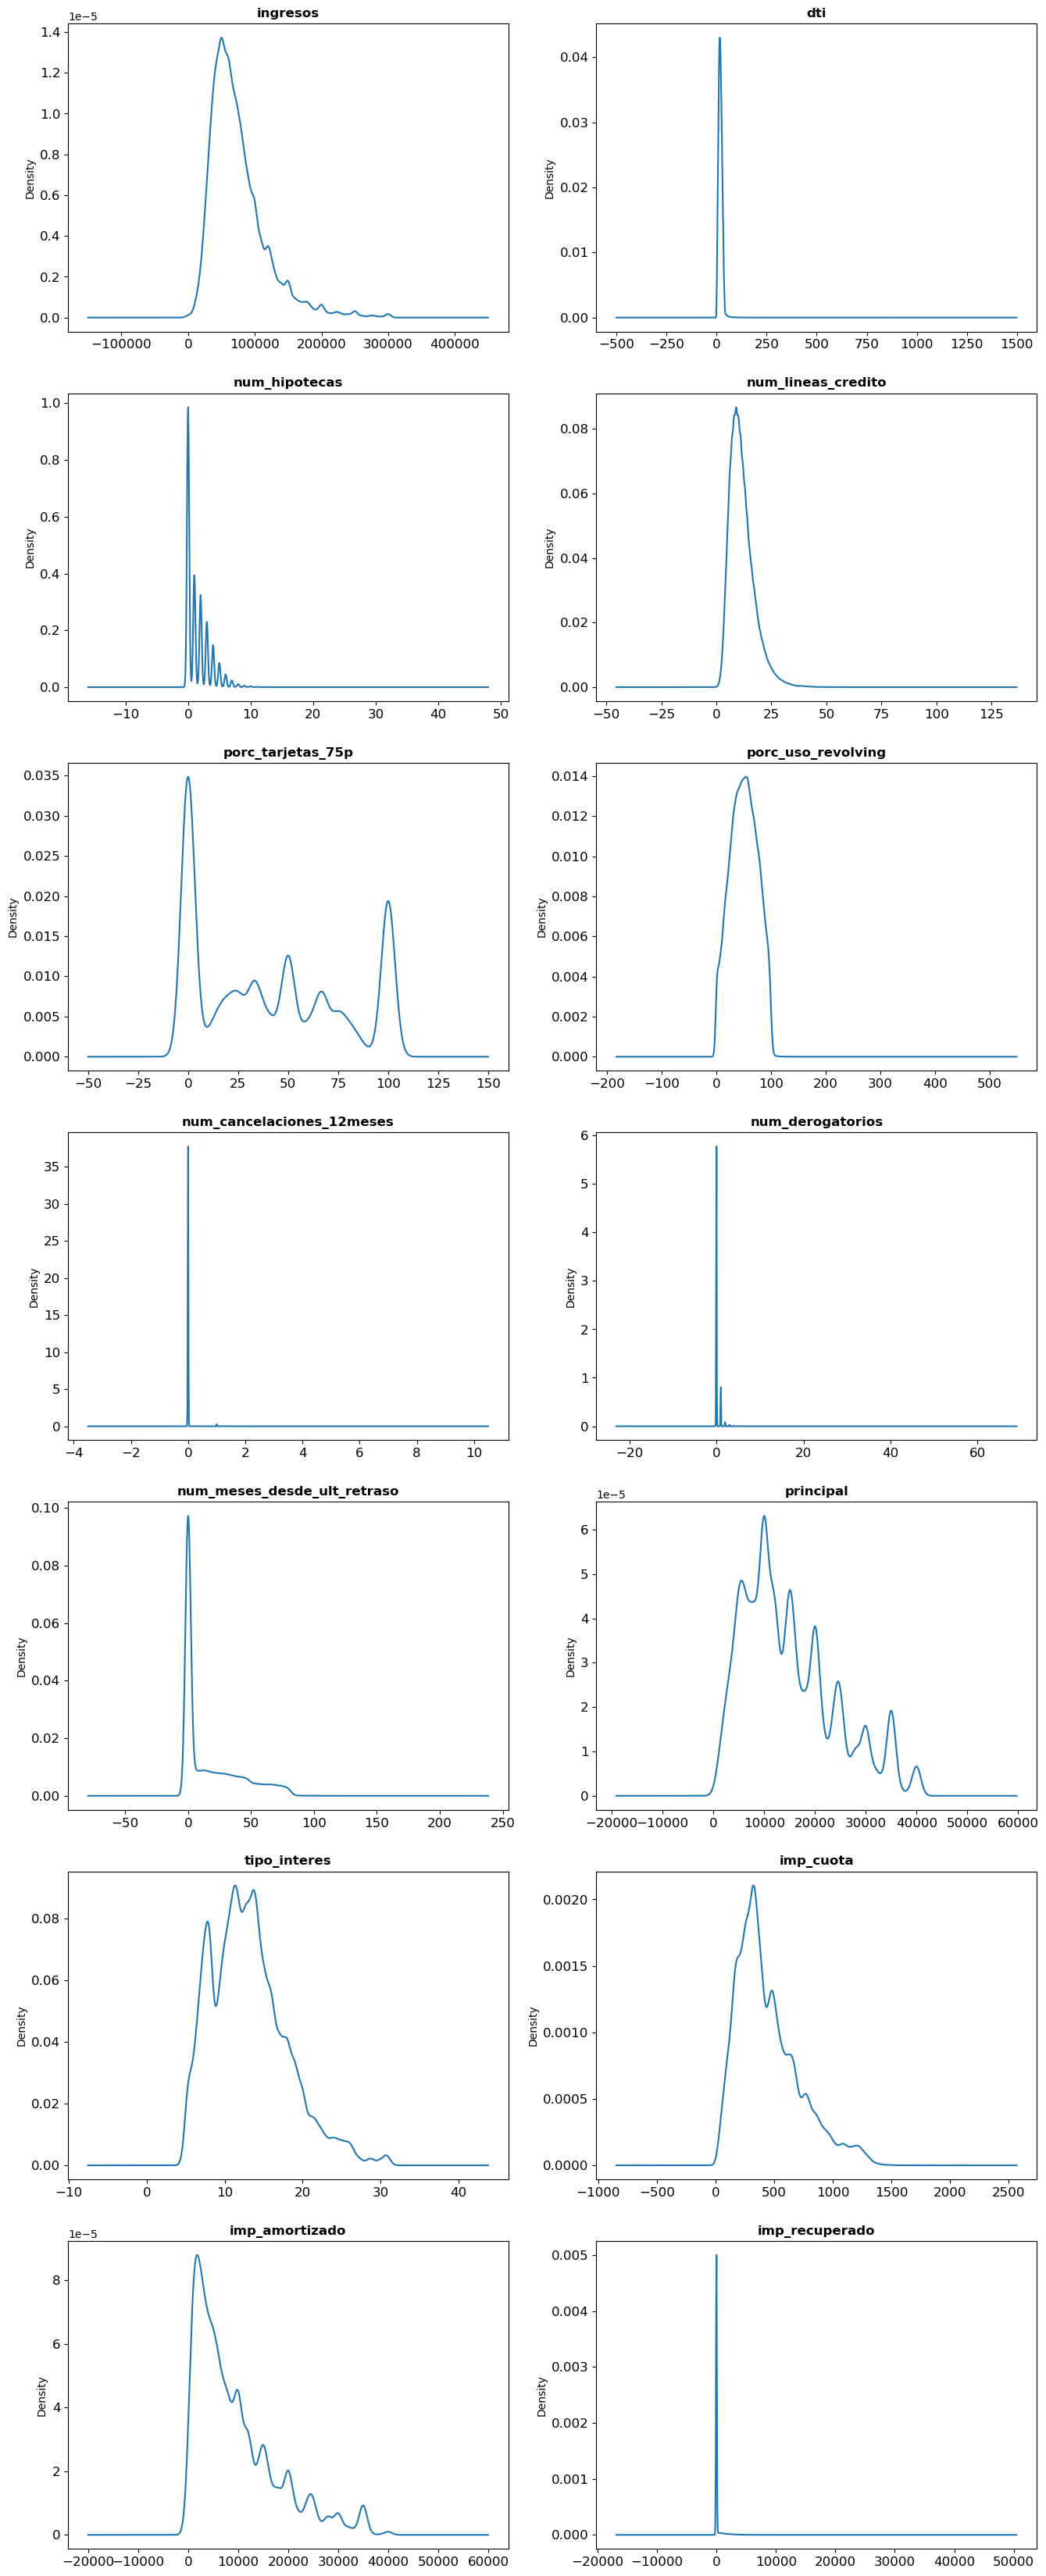

In [15]:
graficos_eda_continuas(num)

Vamos a analizar el detalle de imp_amortizado e imp_recuperado, ya que son relevantes para la target del modelo LGD.

In [16]:
ratios = num[['principal','imp_amortizado','imp_recuperado']].copy()

In [17]:
ratios['r_amortizado_principal'] = ratios.imp_amortizado / ratios.principal
ratios['r_recuperado_principal'] = ratios.imp_recuperado / ratios.principal

In [18]:
ratios.describe().T

,count,mean,std,min,25%,50%,75%,max
principal,139091.0,14971.696947,9138.361523,600.0,8000.000000,12675.000000,20000.00,40000.000000
imp_amortizado,139091.0,9465.577339,8266.953496,0.0,3001.630000,7000.000000,13680.15,40000.000000
imp_recuperado,139091.0,145.258522,765.850245,0.0,0.000000,0.000000,0.00,33666.340000
r_amortizado_principal,139091.0,0.663280,0.369400,0.0,0.274767,0.875182,1.00,1.000032
r_recuperado_principal,139091.0,0.008993,0.041221,0.0,0.000000,0.000000,0.00,1.220774


Conclusiones:

* En transformación convertir num_derogatorios a binaria
* Revisar en profundidad la relación entre estado e imp_recuperado

In [19]:
temp = cat[['estado']].merge(num[['imp_recuperado']], left_index=True, right_index=True)
temp.groupby('estado').imp_recuperado.mean()

estado
Charged Off                                            1226.047470
Current                                                   0.000000
Does not meet the credit policy. Status:Charged Off     702.982857
Does not meet the credit policy. Status:Fully Paid        0.000000
Fully Paid                                                0.000000
In Grace Period                                           0.000000
Late (16-30 days)                                         0.000000
Late (31-120 days)                                        0.000000
Name: imp_recuperado, dtype: float64

Efectivamente sólo hay importe recuperado en el estado Charged Off.

## GUARDAR DATASETS TRAS EDA

Guarda los avances en cat y num con un sufijo para poder guardar o recuperar avances del proyecto.

En formato pickle para no perder las modificaciones de metadatos.

*NOTA: En algunos casos no hay cambios en los ficheros en esta fase, así que este paso es opcional.Pero si no guardas estos ficheros acuérdate de modificar la importación en el siguiente notebook.*

In [20]:
#Definir los nombres de los archivos
ruta_cat = ruta_proyecto + '/02_Datos/03_Trabajo/' + 'cat_resultado_eda.pickle'
ruta_num = ruta_proyecto + '/02_Datos/03_Trabajo/' + 'num_resultado_eda.pickle'

In [21]:
#Guardar los archivos
cat.to_pickle(ruta_cat)
num.to_pickle(ruta_num)